In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Training_Dataset = pd.read_csv('train.csv')
NoneLabel_Dataset = pd.read_csv('test.csv')

In [3]:
df_train = pd.DataFrame (Training_Dataset)
df_test = pd.DataFrame (NoneLabel_Dataset)

In [4]:
Training_Dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


battery_power: Total energy a battery can store in one time measured on mAh

blue: Has blutooth or not 

clock_speed: speed at wich microprocessor executes instructions

dual_sim: Has dual sim support or not 

fc: Front Camera mega pixel 

four_g: Has 4G or not

int-memory: internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone 

n_cores: Nummber of cores of processor

pc : Primary Camera mega pixels

px_height : Pixel Resolution Height

ram : Random Access Memory in Mega Bytes

Sc_h : Screen Height if mobile in cm

Sc_w :Screen Width of mobile in cm 

thalk_time : Longest time that a single battery charge will last when you are 

three_g : Has 3G or not 

touch_screen: Has touch screen or not 

wifi: Has wifi or not 

price_range: This is the target variable with value of 0(low cost),1(medium cost),2(high cost)and 3 (very heigh cost).

# -----------------------------------------------------------------------------------

# Preprocessing 

In [5]:
df_train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df_test.describe(include='all')

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [7]:
print(df_train.isnull().sum())
print('There is not  any missing values')

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
There is not  any missing values


Text(0, 0.5, 'Price Range')

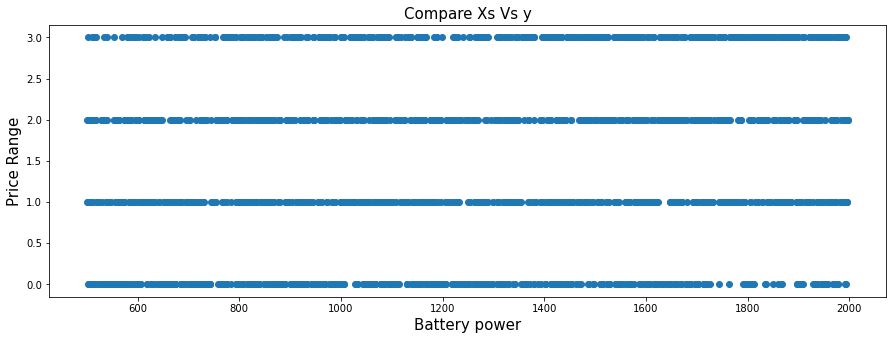

In [8]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['battery_power'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('Battery power',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

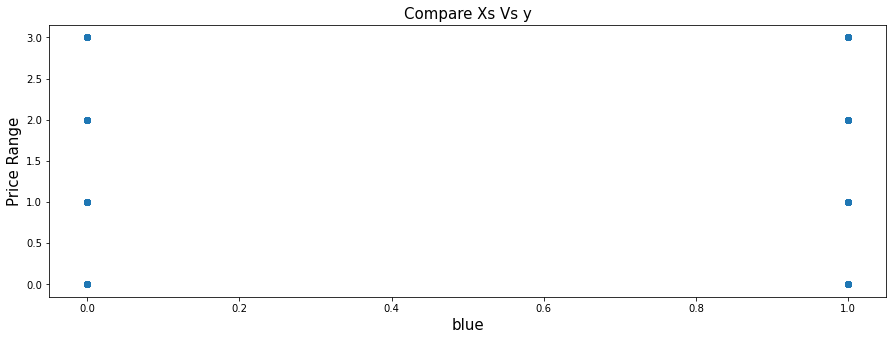

In [9]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['blue'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('blue',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

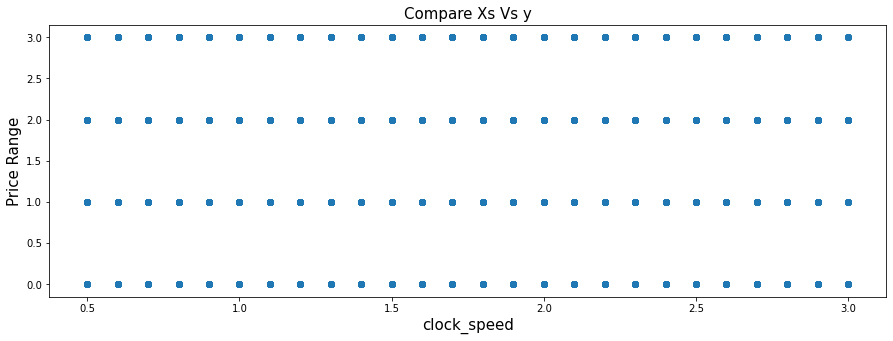

In [10]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['clock_speed'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('clock_speed',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

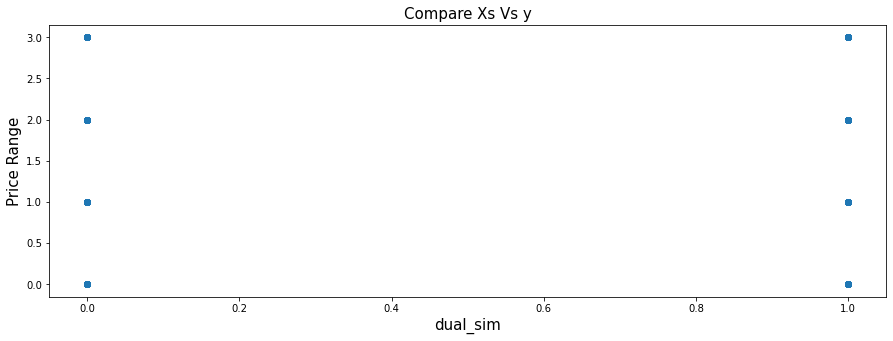

In [11]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['dual_sim'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('dual_sim',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

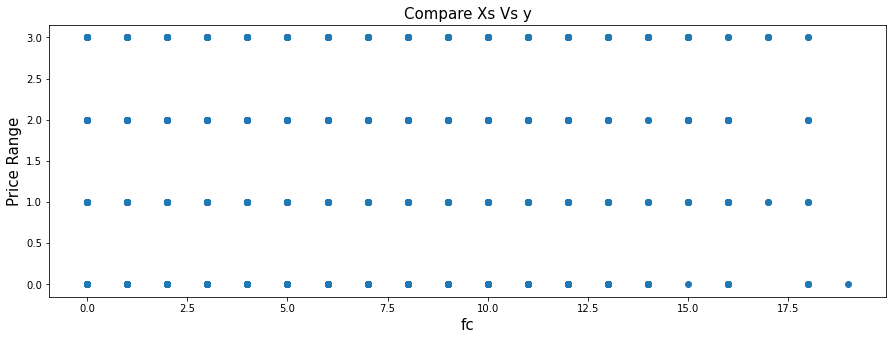

In [12]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['fc'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('fc',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

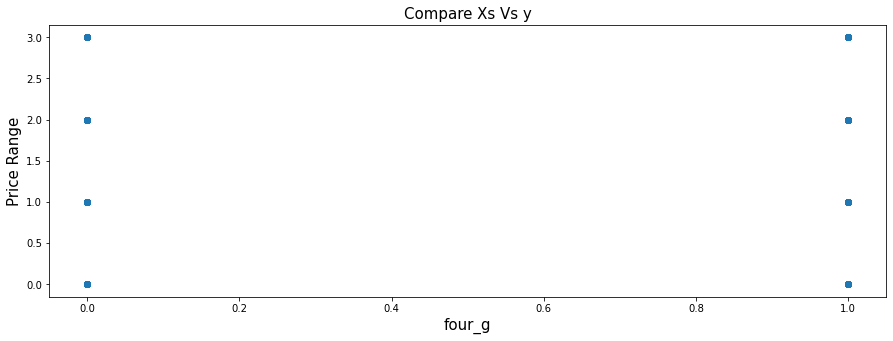

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['four_g'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('four_g',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

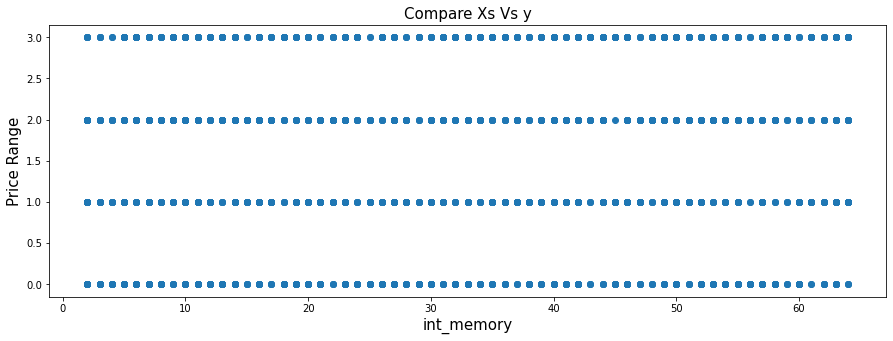

In [14]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['int_memory'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('int_memory',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

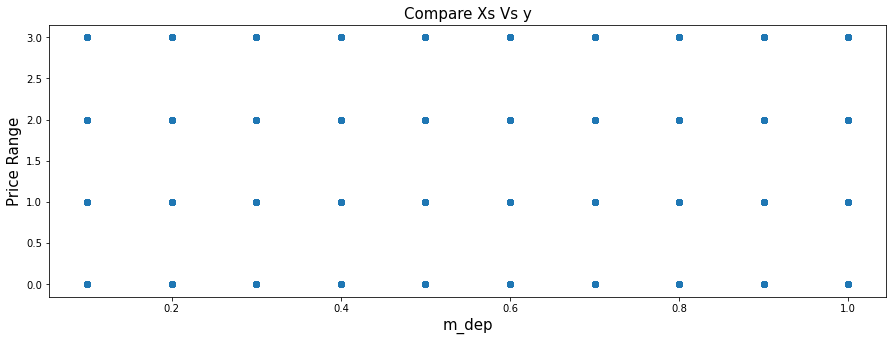

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['m_dep'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('m_dep',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

Text(0, 0.5, 'Price Range')

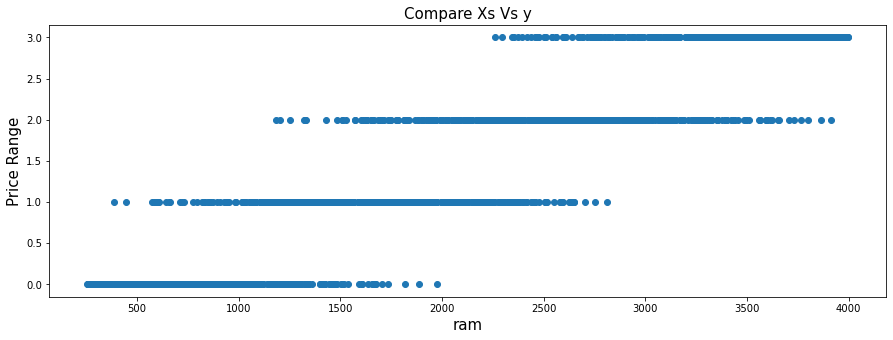

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['ram'],df_train['price_range'])
plt.title('Compare Xs Vs y',fontsize=15)
plt.xlabel('ram',fontsize=15)
plt.ylabel('Price Range',fontsize=15)

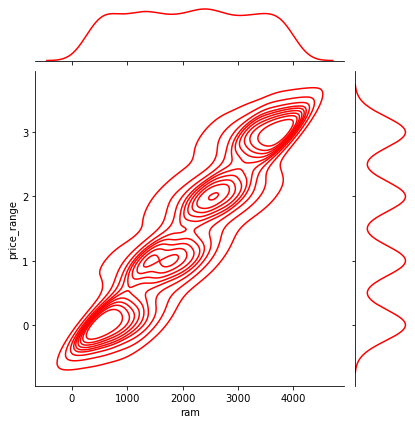

In [17]:
sns.jointplot(x='ram',y='price_range',data=df_train,color='red',kind='kde')
 

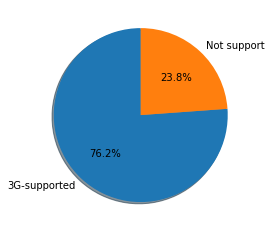

In [18]:
labels = ['3G-supported','Not support']
values=df_train['three_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels , autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

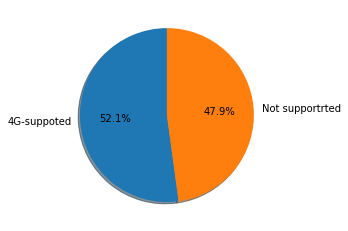

In [19]:
labels4g = ['4G-suppoted','Not supportrted']
values4g = df_train['four_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g , autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

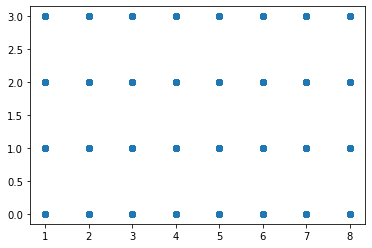

In [20]:
plt.scatter(df_train['n_cores'],df_train['price_range'])

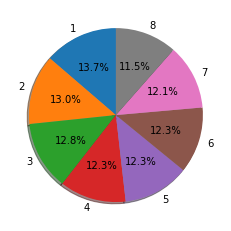

In [21]:
labels4g = ['1','2','3','4','5','6','7','8']
values4g = df_train['n_cores'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g , autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()


In [22]:
df = df_train[df_train['sc_w']>=2]
df.reset_index(inplace= True)
df.drop('index',axis=1,inplace= True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [23]:
df_finall = df[df['px_height']!=0]
df_finall

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [24]:
df2 = df_test[df_test['sc_w']>=2]
df2.reset_index(inplace= True)
df2.drop('index',axis=1,inplace= True)
df2

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
2,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
3,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
4,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,994,567,1,2.7,1,14,1,56,0.4,165,...,17,555,1290,336,7,6,7,1,1,1
785,995,936,1,1.4,1,0,0,46,0.8,139,...,0,265,886,684,8,5,12,1,1,1
786,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
787,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [25]:
df2.drop('id',axis=1,inplace=True)
df2


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,17,555,1290,336,7,6,7,1,1,1
785,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1
786,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
787,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [26]:
df2_finall = df2[df2['px_height']!=0]

In [27]:
print(df2_finall.isnull().sum())
print('There is not any missing values')


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64
There is not any missing values


# Model

# 


# DTs

In [28]:
Xd =df_finall.drop('price_range',axis=1)
Yd =df_finall.price_range.values.reshape(-1,1)

In [29]:
def DTs(Xd,Yd,Testsize,mdepth):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        x_train, x_test, y_train, y_test = train_test_split(Xd,Yd,test_size=x,random_state=0)
        for maxdepth in mdepth:
            clf =DecisionTreeClassifier(max_depth=maxdepth)
            clf.fit(x_train, y_train) 
            y_pred =clf.predict(x_test)
            dict = {'Test_size': x,"Max_depth":maxdepth,'acc':metrics.accuracy_score(y_test,y_pred),'score':clf.score(Xd,Yd)}
            df_evaluation=df_evaluation.append(dict, ignore_index = True)
    return(df_evaluation)
 #This function highlights Maximum values
def highlight_max(s):
    is_max = s ==s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [30]:
df_evaluation = DTs(Xd,Yd,[.1,.15,.2,.25,.3],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,1.000000,0.521739,0.497203
1,0.100000,2.000000,0.776398,0.766314
2,0.100000,3.000000,0.788820,0.775637
3,0.100000,4.000000,0.832298,0.838409
4,0.100000,5.000000,0.813665,0.881914
5,0.100000,6.000000,0.826087,0.916097
6,0.100000,7.000000,0.832298,0.942822
7,0.100000,8.000000,0.832298,0.962710
8,0.100000,9.000000,0.832298,0.970168
9,0.100000,10.000000,0.863354,0.981976


In [31]:
x_train, x_test, y_train, y_test=train_test_split(Xd,Yd,test_size=.1,random_state=0)


In [32]:
clf=DecisionTreeClassifier(max_depth=19,criterion='entropy')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [33]:
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.84472049689441





# RF




In [34]:
Xr =df_finall.drop('price_range',axis=1)
yr =df_finall.price_range.values.reshape(-1,1)


In [35]:
def RF (Xr,yr,Testsize,mdepth):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        x_train, x_test, y_train, y_test = train_test_split(Xr,yr,test_size=x,random_state=0)  
        for maxdepth in mdepth:
            RF=RandomForestClassifier(max_depth=maxdepth,criterion='entropy')
            RF.fit(x_train,y_train) 
            y_pred =RF.predict(x_test)
            dict = {'Test_size': x,"Max_depth":maxdepth,'acc':metrics.accuracy_score(y_test,y_pred),'score':RF.score(Xr,yr)}
            df_evaluation=df_evaluation.append(dict, ignore_index = True)
    return(df_evaluation)



In [36]:
df_evaarangeation = RF(Xr,yr,[.1,.15,.2,.25,.3],[9,10,11,12,13,14,15,16,17,18,19,20])
df_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,1.000000,0.521739,0.497203
1,0.100000,2.000000,0.776398,0.766314
2,0.100000,3.000000,0.788820,0.775637
3,0.100000,4.000000,0.832298,0.838409
4,0.100000,5.000000,0.813665,0.881914
5,0.100000,6.000000,0.826087,0.916097
6,0.100000,7.000000,0.832298,0.942822
7,0.100000,8.000000,0.832298,0.962710
8,0.100000,9.000000,0.832298,0.970168
9,0.100000,10.000000,0.863354,0.981976


In [37]:
x_train, x_test, y_train, y_test=train_test_split(Xd,Yd,test_size=.1,random_state=0)

In [38]:
clf=RandomForestClassifier(max_depth=19,criterion='entropy')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [39]:
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.906832298136646




# SVM


In [40]:
Xs=df_finall.drop('price_range',axis=1)
ys=df_finall.price_range.values.reshape(-1,1)

In [41]:
def svc (Xs,ys,Testsize):
    df_evaluation_svm=pd.DataFrame()
    for x in Testsize:
        x_train, x_test, y_train, y_test = train_test_split(Xs,ys,test_size=x,random_state=0)  
        svm=SVC(kernel='linear')
        svm.fit(x_train,y_train)
        y_pred =svm.predict(x_test)                
        dict = {'Test_size': x,'acc':metrics.accuracy_score(y_test,y_pred),'score':svm.score(Xs,ys)}
        df_evaluation_svm=df_evaluation_svm.append(dict, ignore_index = True)
    return(df_evaluation)

In [42]:
df_evaluation_svm = svc(Xs,ys,[.1,.15,.2,.25,.3])
df_evaluation_svm.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,1.000000,0.521739,0.497203
1,0.100000,2.000000,0.776398,0.766314
2,0.100000,3.000000,0.788820,0.775637
3,0.100000,4.000000,0.832298,0.838409
4,0.100000,5.000000,0.813665,0.881914
5,0.100000,6.000000,0.826087,0.916097
6,0.100000,7.000000,0.832298,0.942822
7,0.100000,8.000000,0.832298,0.962710
8,0.100000,9.000000,0.832298,0.970168
9,0.100000,10.000000,0.863354,0.981976


In [43]:
x_train, x_test, y_train, y_test=train_test_split(Xs,ys,test_size=0.2,random_state=0)

clf=SVC(C=0.75, decision_function_shape = 'ovo', gamma = 'auto' ,kernel='linear',random_state = 2)
clf2 = clf.fit(x_train,y_train)
y_pred=clf2.predict(x_test)
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.9658385093167702




# Predict test data 

In [44]:
Last_one = clf2.predict(df2_finall)

In [45]:
Last_one

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 2, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 3, 3, 2, 2, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

In [46]:
df2_finall['price_range'] = Last_one
df2_finall

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,...,555,1290,336,7,6,7,1,1,1,0
785,936,1,1.4,1,0,0,46,0.8,139,2,...,265,886,684,8,5,12,1,1,1,0
786,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
787,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


# It is done

# For market projects one of the most important alghorithms for modeling is SVM